<a href="https://colab.research.google.com/github/karansalot/DataMagnates_MIS-545/blob/main/DataMagnates_Final_0512.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 import pandas as pd

# Load the Excel file
file_path = 'UAIRDATA 16248.xlsx'  # Update this path if your file is stored elsewhere
excel_data = pd.ExcelFile(file_path)

# Load the Enrollment sheet
enrollment_data = excel_data.parse('Enrollment')



In [ ]:
# Check for missing values
missing_values = enrollment_data.isnull().sum()

# Display columns with missing values
print("Missing values in each column:\n", missing_values)

# Handle missing values (example: fill NA for categorical with 'Unknown')
enrollment_data.fillna("Unknown", inplace=True)

# Check for duplicate rows
duplicates = enrollment_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Drop duplicates if any
enrollment_data.drop_duplicates(inplace=True)

Missing values in each column:
 Academic Career                     0
Academic Program Campus             0
College                             0
UA Full Time Part Time              0
Reporting Residency                 0
Headcount                           0
Cohort                              0
IPEDS Race/Ethnicity Description    0
Term                                0
Gender                              0
Pell Eligibility Flag               0
dtype: int64
Number of duplicate rows: 0


Full-Time vs Part-Time Enrollment Distribution

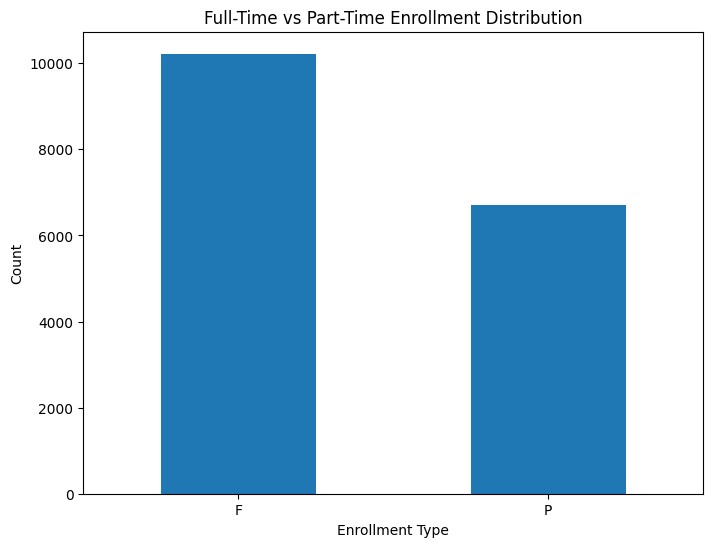

In [ ]:
import matplotlib.pyplot as plt

# Full-time vs Part-time distribution
enrollment_data['UA Full Time Part Time'].value_counts().plot(kind='bar', figsize=(8, 6))
plt.title('Full-Time vs Part-Time Enrollment Distribution')
plt.xlabel('Enrollment Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


Enrollment Trends by Term

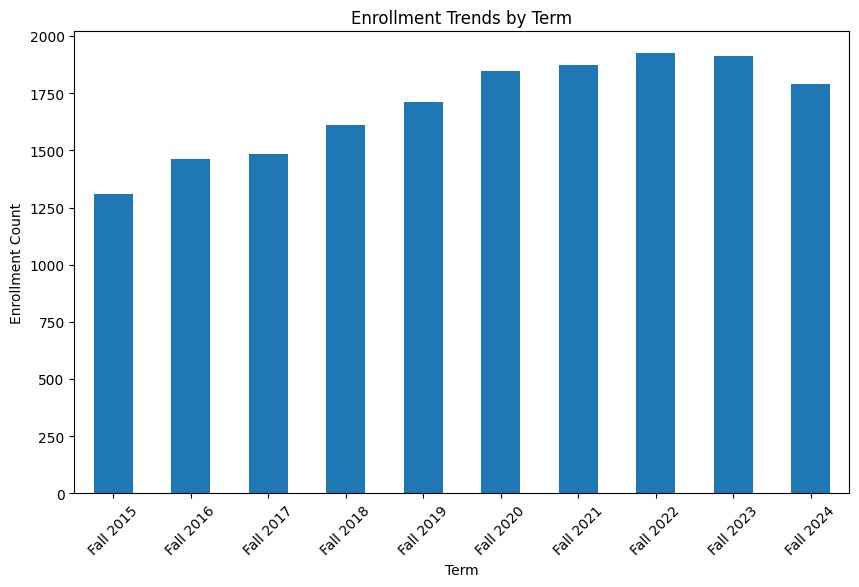

In [ ]:
# Enrollment trends by term
term_counts = enrollment_data['Term'].value_counts().sort_index()
term_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Enrollment Trends by Term')
plt.xlabel('Term')
plt.ylabel('Enrollment Count')
plt.xticks(rotation=45)
plt.show()


Gender Distribution

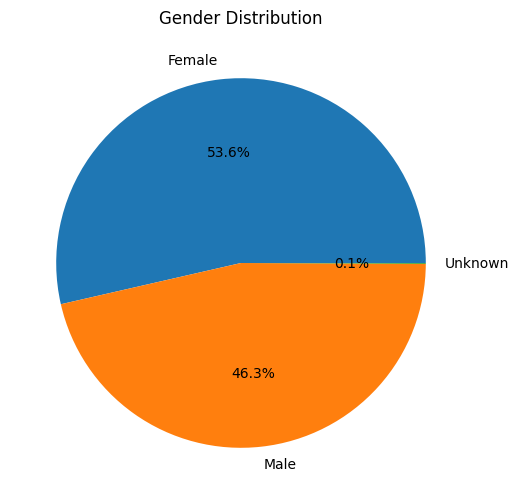

In [ ]:
# Gender distribution
gender_counts = enrollment_data['Gender'].value_counts()
gender_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6))
plt.title('Gender Distribution')
plt.ylabel('')  # Remove y-axis label for better visualization
plt.show()


<Figure size 1000x600 with 0 Axes>

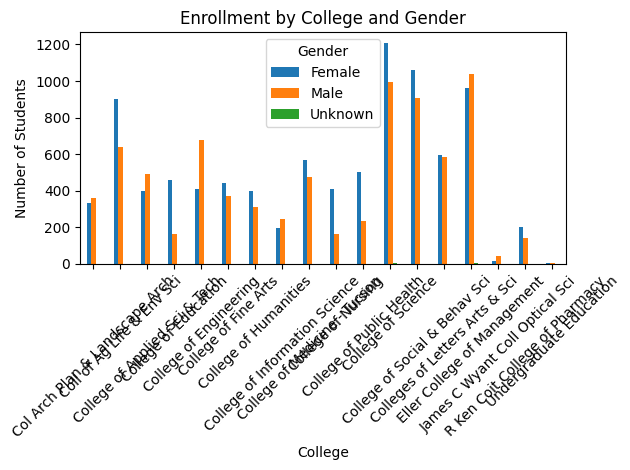

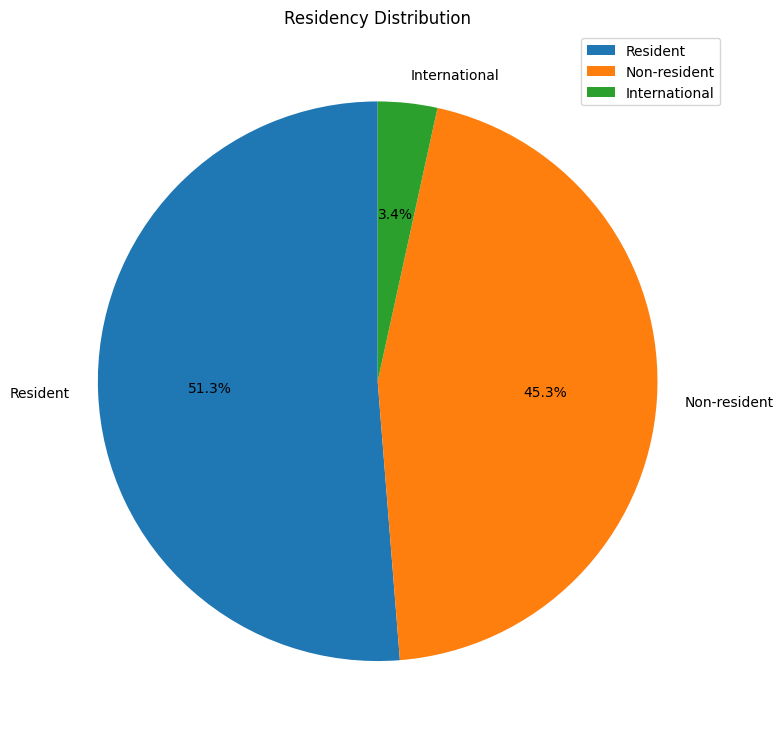

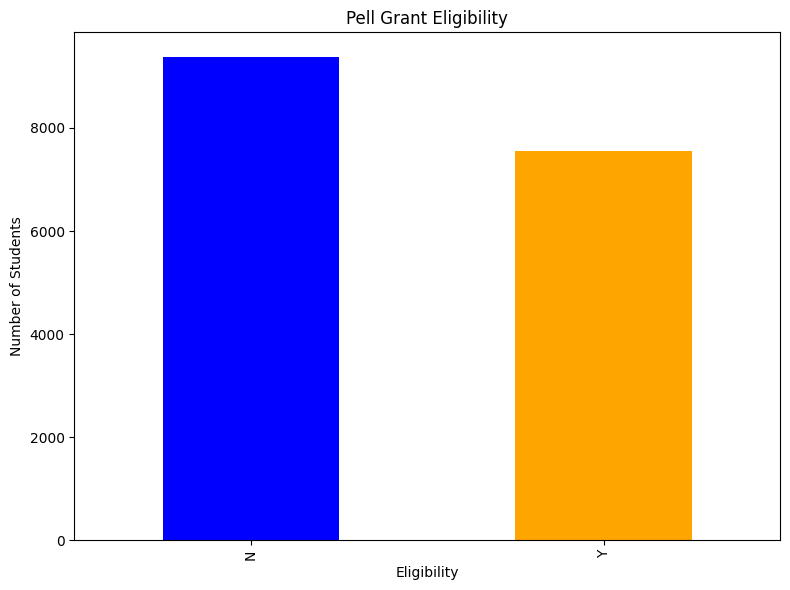

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = '/content/UAIRDATA 16248.xlsx'  # Replace with your file path
enrollment_data = pd.read_excel(file_path, sheet_name='Enrollment')

# Cleaning and summarizing the data
enrollment_summary = enrollment_data.groupby(['College', 'Gender']).size().unstack().fillna(0)
residency_summary = enrollment_data['Reporting Residency'].value_counts()
pell_eligibility_summary = enrollment_data['Pell Eligibility Flag'].value_counts()

# Plot 1: Enrollment by College and Gender
plt.figure(figsize=(10, 6))
enrollment_summary.plot(kind='bar')
plt.title('Enrollment by College and Gender')
plt.ylabel('Number of Students')
plt.xlabel('College')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2: Residency Distribution
plt.figure(figsize=(8, 8))
residency_summary.plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=True)
plt.title('Residency Distribution')
plt.ylabel('')  # Hide y-axis label
plt.tight_layout()
plt.show()

# Plot 3: Pell Eligibility
plt.figure(figsize=(8, 6))
pell_eligibility_summary.plot(kind='bar', color=['blue', 'orange'])
plt.title('Pell Grant Eligibility')
plt.ylabel('Number of Students')
plt.xlabel('Eligibility')
plt.tight_layout()
plt.show()


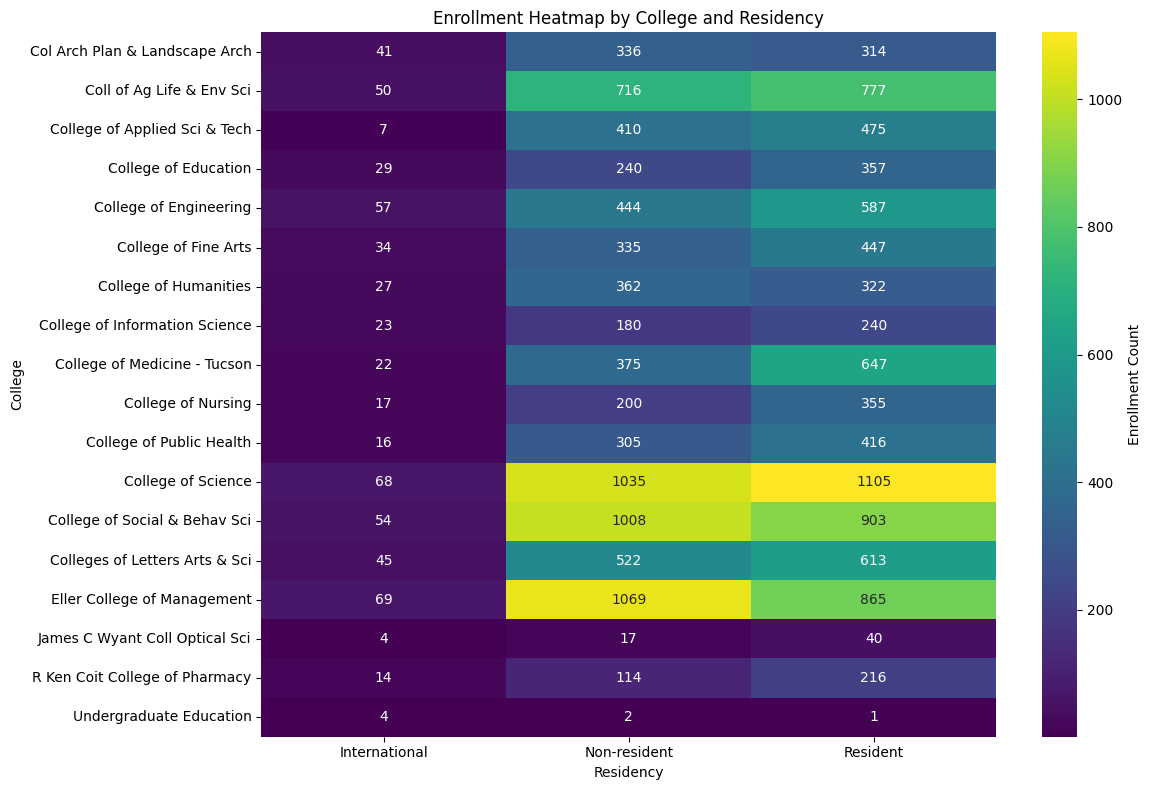

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = '/content/UAIRDATA 16248.xlsx'  # Replace with your file path
enrollment_data = pd.read_excel(file_path, sheet_name='Enrollment')

# Summarize enrollment data across College and Residency
heatmap_data = enrollment_data.groupby(['College', 'Reporting Residency']).size().unstack().fillna(0)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt="g", cmap="viridis", cbar_kws={'label': 'Enrollment Count'})
plt.title('Enrollment Heatmap by College and Residency')
plt.xlabel('Residency')
plt.ylabel('College')
plt.tight_layout()
plt.show()


Reporting Residency Distribution

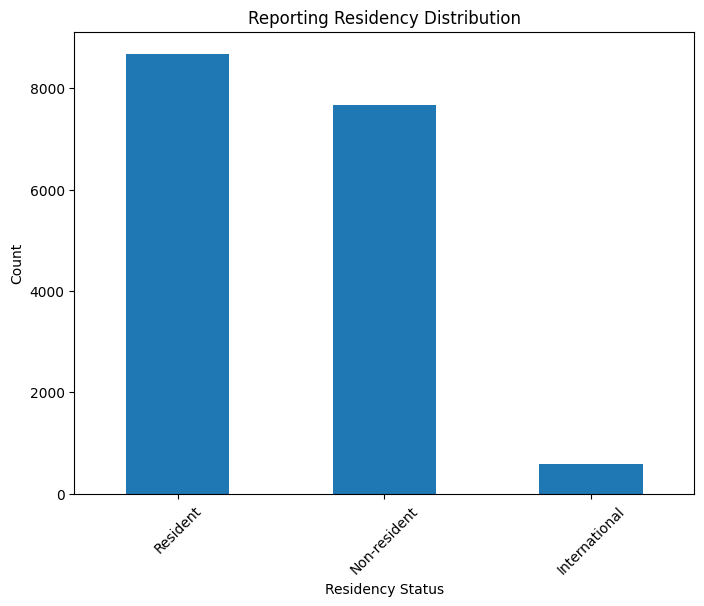

In [ ]:
# Reporting Residency distribution
residency_counts = enrollment_data['Reporting Residency'].value_counts()
residency_counts.plot(kind='bar', figsize=(8, 6))
plt.title('Reporting Residency Distribution')
plt.xlabel('Residency Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


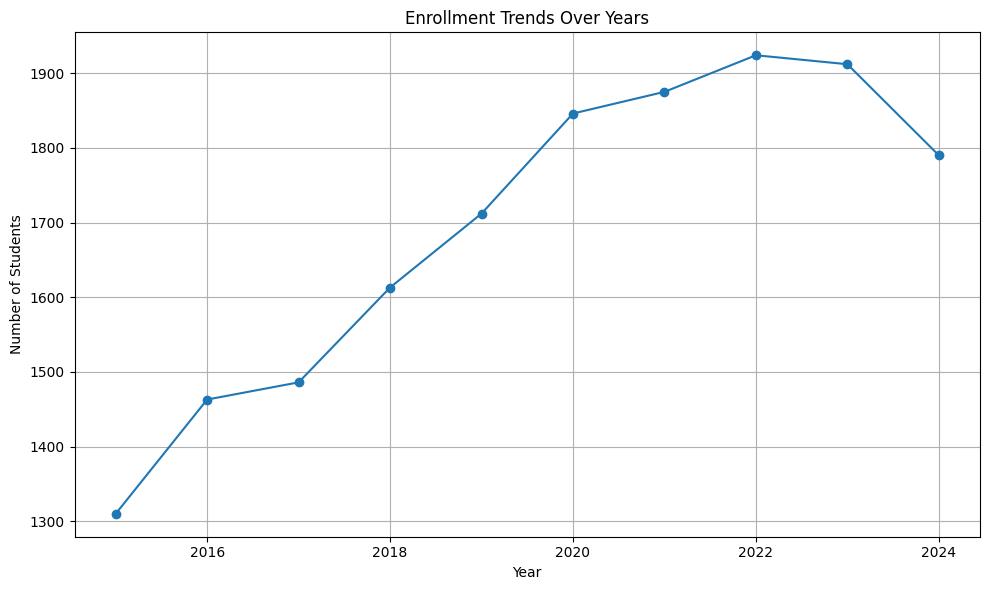

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = '/content/UAIRDATA 16248.xlsx'  # Replace with your file path
enrollment_data = pd.read_excel(file_path, sheet_name='Enrollment')

# Extract the year from the 'Term' column
enrollment_data['Year'] = enrollment_data['Term'].str.extract(r'(\d{4})').astype(float)

# Group data by year to observe enrollment trends
yearly_trend = enrollment_data.groupby('Year').size()

# Plotting the trend over years
plt.figure(figsize=(10, 6))
yearly_trend.plot(kind='line', marker='o')
plt.title('Enrollment Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

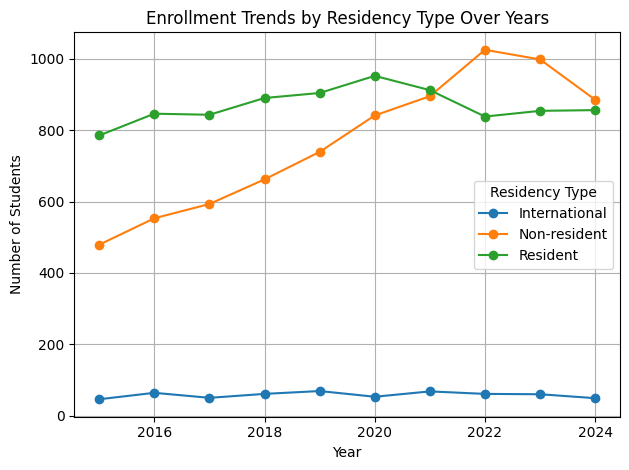

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = '/content/UAIRDATA 16248.xlsx'  # Replace with your file path
enrollment_data = pd.read_excel(file_path, sheet_name='Enrollment')

# Extract the year from the 'Term' column
enrollment_data['Year'] = enrollment_data['Term'].str.extract(r'(\d{4})').astype(float)

# Group data by year and residency type to analyze trends
residency_trends = enrollment_data.groupby(['Year', 'Reporting Residency']).size().unstack(fill_value=0)

# Plotting trends by residency type over the years
plt.figure(figsize=(10, 6))
residency_trends.plot(kind='line', marker='o')
plt.title('Enrollment Trends by Residency Type Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.grid(True)
plt.legend(title='Residency Type')
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

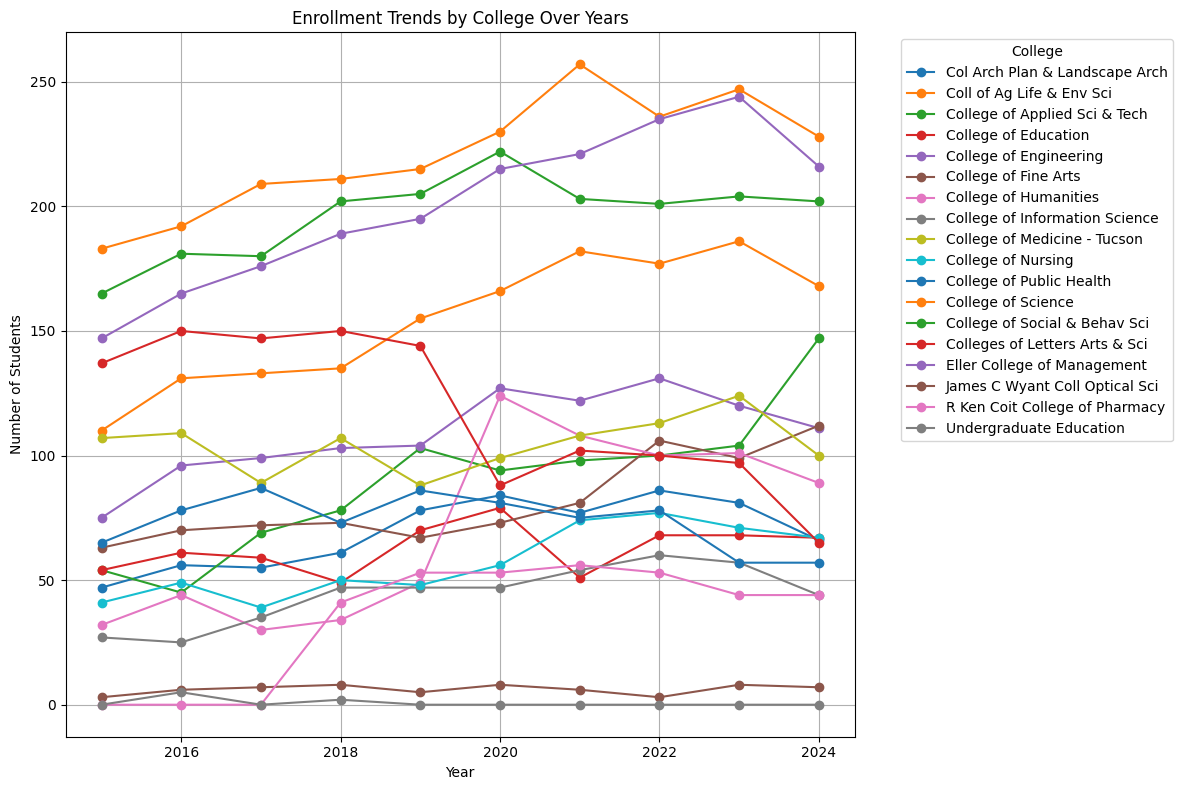

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = '/content/UAIRDATA 16248.xlsx'  # Replace with your file path
enrollment_data = pd.read_excel(file_path, sheet_name='Enrollment')

# Extract the year from the 'Term' column
enrollment_data['Year'] = enrollment_data['Term'].str.extract(r'(\d{4})').astype(float)

# Group data by year and college to analyze trends
college_trends = enrollment_data.groupby(['Year', 'College']).size().unstack(fill_value=0)

# Plotting trends by college over the years
plt.figure(figsize=(12, 8))
college_trends.plot(kind='line', marker='o', figsize=(12, 8))
plt.title('Enrollment Trends by College Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.grid(True)
plt.legend(title='College', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

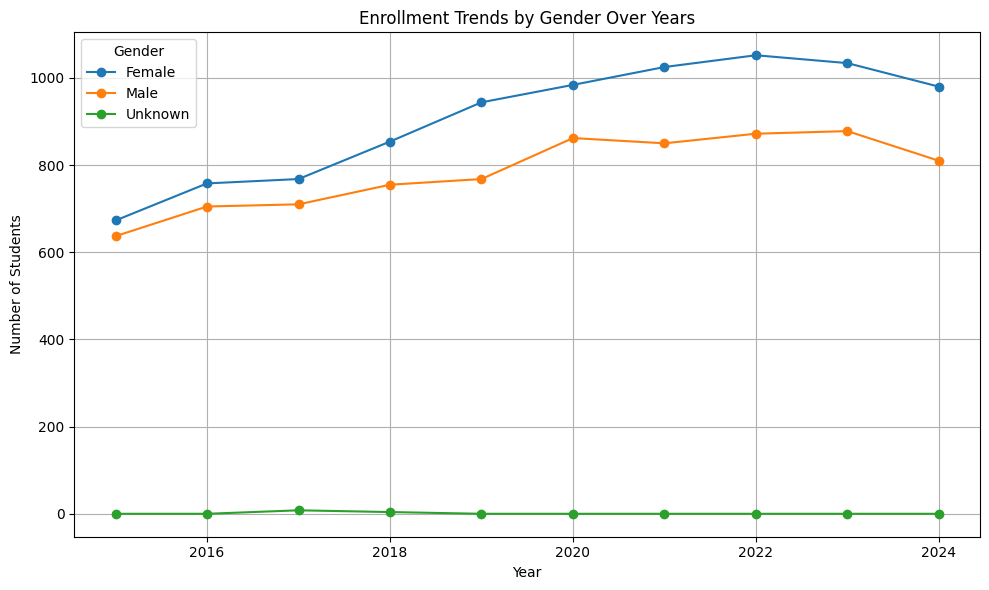

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = '/content/UAIRDATA 16248.xlsx'  # Replace with your file path
enrollment_data = pd.read_excel(file_path, sheet_name='Enrollment')

# Extract the year from the 'Term' column
enrollment_data['Year'] = enrollment_data['Term'].str.extract(r'(\d{4})').astype(float)

# Group data by year and gender to analyze trends
gender_trends = enrollment_data.groupby(['Year', 'Gender']).size().unstack(fill_value=0)

# Plotting trends by gender over the years
plt.figure(figsize=(10, 6))
gender_trends.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Enrollment Trends by Gender Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.grid(True)
plt.legend(title='Gender', loc='upper left')
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

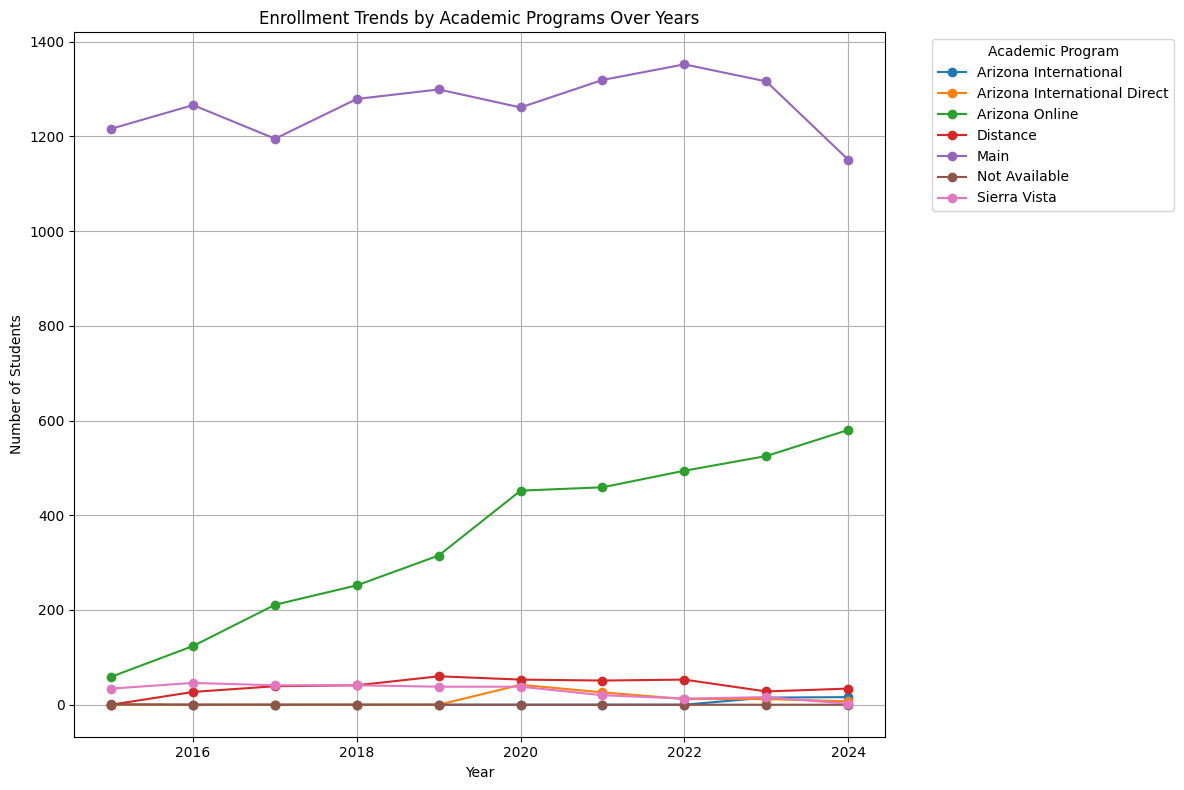

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = '/content/UAIRDATA 16248.xlsx'  # Replace with your file path
enrollment_data = pd.read_excel(file_path, sheet_name='Enrollment')

# Extract the year from the 'Term' column
enrollment_data['Year'] = enrollment_data['Term'].str.extract(r'(\d{4})').astype(float)

# Group data by year and academic program to analyze trends
program_trends = enrollment_data.groupby(['Year', 'Academic Program Campus']).size().unstack(fill_value=0)

# Plotting trends by academic program over the years
plt.figure(figsize=(12, 8))
program_trends.plot(kind='line', marker='o', figsize=(12, 8))
plt.title('Enrollment Trends by Academic Programs Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.grid(True)
plt.legend(title='Academic Program', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Step 3: Data Preprocessing
We will now:

Encode categorical variables: Convert textual data into numerical format using one-hot encoding or label encoding.
Scale numerical features: Use feature scaling for numerical data (if any exist).
Split the dataset: Separate it into training and testing sets for modeling.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
import pandas as pd # import pandas to use the to_numeric function

# Step 1: Encode categorical variables
# Identify categorical columns
categorical_columns = enrollment_data.select_dtypes(include=['object']).columns

# Use LabelEncoder to encode categories
label_encoders = {}
for col in categorical_columns:
    # Convert the column to string type to ensure uniformity
    enrollment_data[col] = enrollment_data[col].astype(str)

    le = LabelEncoder()
    enrollment_data[col] = le.fit_transform(enrollment_data[col])
    label_encoders[col] = le  # Save the encoder for future decoding if needed

# Step 2: Feature Scaling (if applicable)
# Example: Scale headcount (if numeric and not already scaled)
# Assuming a numeric column "Headcount" exists, scale it.
scaler = StandardScaler()
if 'Headcount' in enrollment_data.columns and np.issubdtype(enrollment_data['Headcount'].dtype, np.number):
    enrollment_data['Headcount'] = scaler.fit_transform(enrollment_data[['Headcount']])

# Step 3: Splitting Data into Training and Testing Sets
# Define features (X) and target (y)
# Example: Use "UA Full Time Part Time" as the target column
X = enrollment_data.drop(columns=['UA Full Time Part Time'])
y = enrollment_data['UA Full Time Part Time']

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display dataset shapes
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)

Training Features Shape: (13544, 10)
Testing Features Shape: (3387, 10)
Training Labels Shape: (13544,)
Testing Labels Shape: (3387,)


Step 4: Model Building and Evaluation
We will now:

Apply classification algorithms to predict "Full-Time vs. Part-Time Enrollment."
Use cross-validation and hyperparameter tuning to optimize models.
Evaluate model performance.

Classification Models to Apply:
Logistic Regression
Support Vector Machines (SVM)
Decision Trees
k-Nearest Neighbors (k-NN)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

# Define a function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 1. Logistic Regression
print("Logistic Regression")
logistic_model = LogisticRegression()
evaluate_model(logistic_model, X_train, X_test, y_train, y_test)

# 2. Support Vector Machine (SVM)
print("\nSupport Vector Machine (SVM)")
svm_model = SVC()
evaluate_model(svm_model, X_train, X_test, y_train, y_test)

# 3. Decision Tree
print("\nDecision Tree")
dt_model = DecisionTreeClassifier()
evaluate_model(dt_model, X_train, X_test, y_train, y_test)

# 4. k-Nearest Neighbors (k-NN)
print("\nk-Nearest Neighbors (k-NN)")
knn_model = KNeighborsClassifier()
evaluate_model(knn_model, X_train, X_test, y_train, y_test)

# Optional: Hyperparameter Tuning Example for k-NN
print("\nHyperparameter Tuning for k-NN")
param_grid = {'n_neighbors': [3, 5, 7, 9]}
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
best_knn_model = grid_search.best_estimator_
evaluate_model(best_knn_model, X_train, X_test, y_train, y_test)


Logistic Regression
Accuracy: 0.66

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.88      0.75      2032
           1       0.64      0.32      0.43      1355

    accuracy                           0.66      3387
   macro avg       0.65      0.60      0.59      3387
weighted avg       0.65      0.66      0.62      3387


Support Vector Machine (SVM)
Accuracy: 0.66

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.88      0.76      2032
           1       0.65      0.33      0.44      1355

    accuracy                           0.66      3387
   macro avg       0.65      0.61      0.60      3387
weighted avg       0.66      0.66      0.63      3387


Decision Tree
Accuracy: 0.51

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.62      0.60      2032
           1       0.38      0.34      0.36      135

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split

# Step 1: Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X is your feature set

# Optional: Dimensionality Reduction
pca = PCA(n_components=0.95)  # Retain 95% variance
X_pca = pca.fit_transform(X_scaled)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Define a function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Logistic Regression with Hyperparameter Tuning
print("\nLogistic Regression with Hyperparameter Tuning")
param_grid_lr = {'C': [0.01, 0.1, 1, 10, 100]}
logistic_model = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5, scoring='accuracy')
evaluate_model(logistic_model, X_train, X_test, y_train, y_test)
print("Best Parameters for Logistic Regression:", logistic_model.best_params_)

# SVM with Hyperparameter Tuning
print("\nSupport Vector Machine (SVM) with Hyperparameter Tuning")
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_model = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy')
evaluate_model(svm_model, X_train, X_test, y_train, y_test)
print("Best Parameters for SVM:", svm_model.best_params_)

# Decision Tree with Hyperparameter Tuning
print("\nDecision Tree with Hyperparameter Tuning")
param_grid_dt = {'max_depth': [None, 5, 10, 20], 'min_samples_split': [2, 5, 10]}
dt_model = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5, scoring='accuracy')
evaluate_model(dt_model, X_train, X_test, y_train, y_test)
print("Best Parameters for Decision Tree:", dt_model.best_params_)

# k-NN with Hyperparameter Tuning
print("\nk-Nearest Neighbors (k-NN) with Hyperparameter Tuning")
param_grid_knn = {'n_neighbors': [3, 5, 7, 9]}
knn_model = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
evaluate_model(knn_model, X_train, X_test, y_train, y_test)
print("Best Parameters for k-NN:", knn_model.best_params_)

# Random Forest with Hyperparameter Tuning
print("\nRandom Forest with Hyperparameter Tuning")
param_grid_rf = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5]}
rf_model = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
evaluate_model(rf_model, X_train, X_test, y_train, y_test)
print("Best Parameters for Random Forest:", rf_model.best_params_)

# Ensemble Voting Classifier
from sklearn.ensemble import VotingClassifier

print("\nEnsemble Voting Classifier")
voting_model = VotingClassifier(estimators=[
    ('lr', logistic_model.best_estimator_),
    ('svm', svm_model.best_estimator_),
    ('dt', dt_model.best_estimator_),
    ('knn', knn_model.best_estimator_),
    ('rf', rf_model.best_estimator_),
], voting='hard')
evaluate_model(voting_model, X_train, X_test, y_train, y_test)



Logistic Regression with Hyperparameter Tuning
Accuracy: 0.66

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.83      0.75      2032
           1       0.62      0.41      0.49      1355

    accuracy                           0.66      3387
   macro avg       0.65      0.62      0.62      3387
weighted avg       0.65      0.66      0.64      3387

Best Parameters for Logistic Regression: {'C': 100}

Support Vector Machine (SVM) with Hyperparameter Tuning


In [ ]:
# Load the dataset
file_path = '/content/UAIRDATA 16248.xlsx'  # Update this to your file path
data = pd.ExcelFile(file_path).parse('Enrollment')  # Adjust sheet name if necessary

# Define target and features
target_column = 'UA Full Time Part Time'  # Replace with your actual target column name

if target_column not in data.columns:
    print(f"Error: Target column '{target_column}' not found in the dataset.")
    print("Available columns:", data.columns)
else:
    # Define feature set (X) and target (y)
    X = data.drop(columns=[target_column])  # Drop target column from features
    y = data[target_column]

    # Encode target and categorical features if needed
    if y.dtype == 'object' or y.dtype.name == 'category':
        y = y.astype('category').cat.codes  # Encode target

    X = pd.get_dummies(X, drop_first=True)  # Encode categorical features
    print("X and y successfully defined.")


X and y successfully defined.


Part 1: Ensemble Methods

In [ ]:
!pip install --upgrade scikit-learn


from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier # Make sure to import DecisionTreeClassifier

# Random Forest
print("\nRandom Forest Classifier")
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report for Random Forest:\n", classification_report(y_test, y_pred_rf))

# Bagging Classifier
print("\nBagging Classifier")
# For older versions of scikit-learn, remove 'base_estimator' and use the 'estimator' argument if available, or upgrade scikit-learn.
#bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
# Updated code to avoid 'base_estimator' argument:
bagging_model = BaggingClassifier(DecisionTreeClassifier(), n_estimators=50, random_state=42) # Pass the estimator as the first argument
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)
print("Bagging Accuracy:", accuracy_score(y_test, y_pred_bagging))
print("\nClassification Report for Bagging:\n", classification_report(y_test, y_pred_bagging))


Random Forest Classifier
Random Forest Accuracy: 0.544434602893416

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.62      0.64      0.63      2032
           1       0.43      0.40      0.41      1355

    accuracy                           0.54      3387
   macro avg       0.52      0.52      0.52      3387
weighted avg       0.54      0.54      0.54      3387


Bagging Classifier
Bagging Accuracy: 0.5441393563625627

Classification Report for Bagging:
               precision    recall  f1-score   support

           0       0.62      0.63      0.62      2032
           1       0.43      0.41      0.42      1355

    accuracy                           0.54      3387
   macro avg       0.52      0.52      0.52      3387
weighted avg       0.54      0.54      0.54      3387



Part 2: Clustering

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

# Standardize features for clustering
X_scaled = scaler.fit_transform(X)

# K-Means Clustering
print("\nK-Means Clustering")
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_silhouette:.2f}")

# Hierarchical Clustering
print("\nHierarchical Clustering")
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X_scaled)
hierarchical_silhouette = silhouette_score(X_scaled, hierarchical_labels)
print(f"Hierarchical Clustering Silhouette Score: {hierarchical_silhouette:.2f}")

# DBSCAN Clustering
print("\nDBSCAN Clustering")
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Ensure we have clusters to calculate silhouette score
if len(set(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(X_scaled, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.2f}")
else:
    print("DBSCAN failed to form clusters with the current parameters.")



K-Means Clustering
K-Means Silhouette Score: 0.14

Hierarchical Clustering
Hierarchical Clustering Silhouette Score: 0.16

DBSCAN Clustering
DBSCAN Silhouette Score: 0.05


Explanation:
Ensemble Methods:
Random Forest: Combines multiple decision trees with bagging to improve performance.
Bagging Classifier: Uses an ensemble of decision trees to reduce variance.
Clustering:
K-Means: Groups data into clusters and evaluates with the silhouette score.
Hierarchical Clustering: Groups data hierarchically and evaluates performance.
DBSCAN: Forms clusters based on density but might fail to cluster if parameters are unsuitable.

Step 6: MLOps
We will:

Create a Pipeline to automate preprocessing and modeling.
Demonstrate how to save and load models using joblib.


MLOps Code
Creating a Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Example pipeline: Preprocessing + Random Forest
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('classifier', RandomForestClassifier(random_state=42))  # Model
])

# Fit pipeline on training data
pipeline.fit(X_train, y_train)

# Evaluate pipeline on test data
y_pred_pipeline = pipeline.predict(X_test)
print("\nPipeline Accuracy:", accuracy_score(y_test, y_pred_pipeline))
print("Pipeline Classification Report:\n", classification_report(y_test, y_pred_pipeline))



Pipeline Accuracy: 0.5459108355476823
Pipeline Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.64      0.63      2032
           1       0.43      0.40      0.42      1355

    accuracy                           0.55      3387
   macro avg       0.52      0.52      0.52      3387
weighted avg       0.54      0.55      0.54      3387



Saving and Loading the Model

In [ ]:
import joblib

# Save the model pipeline
joblib.dump(pipeline, 'model_pipeline.pkl')
print("Model pipeline saved as 'model_pipeline.pkl'.")

# Load the model pipeline
loaded_pipeline = joblib.load('model_pipeline.pkl')
print("Model pipeline loaded.")

# Predict using the loaded pipeline
loaded_predictions = loaded_pipeline.predict(X_test)
print("\nLoaded Pipeline Accuracy:", accuracy_score(y_test, loaded_predictions))


Model pipeline saved as 'model_pipeline.pkl'.
Model pipeline loaded.

Loaded Pipeline Accuracy: 0.5459108355476823


Explanation:

MLOps:
Pipelines combine preprocessing and modeling for streamlined workflows.
Saving/Loading Models facilitates deployment and reuse.

Step 7: Fine-Tuning and Additional Analyses
This step focuses on:

Hyperparameter Tuning for Models: Fine-tuning models for optimal performance using GridSearchCV.
Visualization of Results: Plot performance metrics and insights from clustering and classification.
Additional Insights: Leverage data visualization for deeper understanding.

In [ ]:
# Perform hyperparameter tuning for Random Forest
from sklearn.model_selection import GridSearchCV

print("\nHyperparameter Tuning for Random Forest")
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              param_grid=param_grid_rf, cv=5, scoring='accuracy', verbose=1)
grid_search_rf.fit(X_train, y_train)

print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
best_rf_model = grid_search_rf.best_estimator_

# Evaluate the tuned model
y_pred_tuned_rf = best_rf_model.predict(X_test)
print("\nTuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_tuned_rf))
print("Tuned Random Forest Classification Report:\n", classification_report(y_test, y_pred_tuned_rf))



Hyperparameter Tuning for Random Forest
Fitting 5 folds for each of 108 candidates, totalling 540 fits


Visualization of Clustering Results

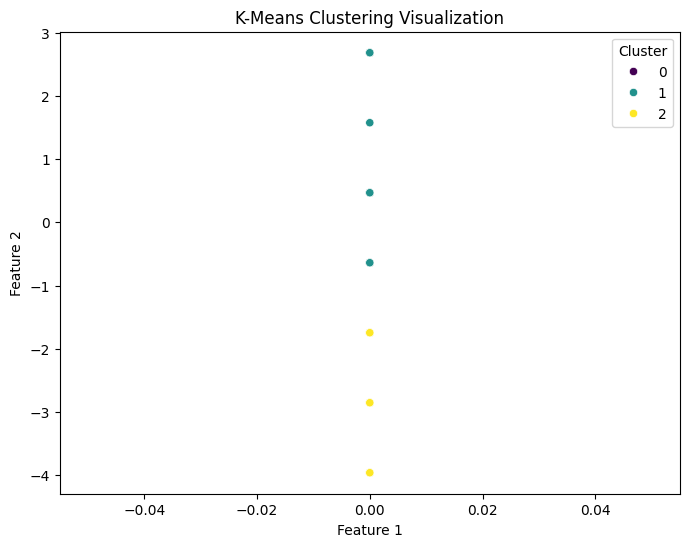

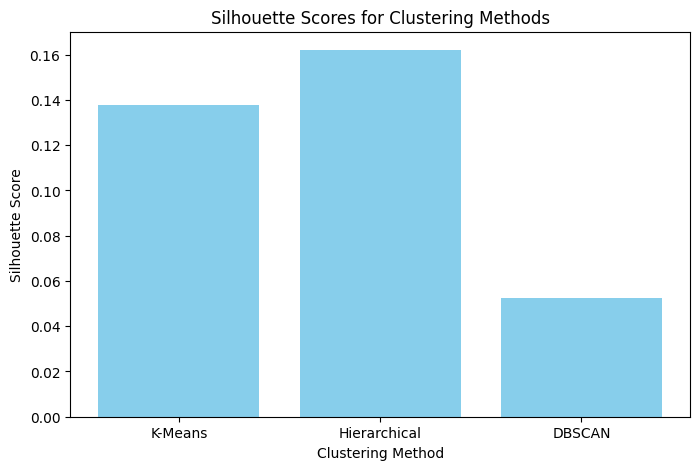

In [ ]:
import seaborn as sns

# Visualize K-Means clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=kmeans_labels, palette="viridis")
plt.title("K-Means Clustering Visualization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title="Cluster")
plt.show()

# Visualize Silhouette Scores for Various Clustering Techniques
silhouette_scores = {
    'K-Means': kmeans_silhouette,
    'Hierarchical': hierarchical_silhouette,
    'DBSCAN': dbscan_silhouette if len(set(dbscan_labels)) > 1 else 0
}

plt.figure(figsize=(8, 5))
plt.bar(silhouette_scores.keys(), silhouette_scores.values(), color="skyblue")
plt.title("Silhouette Scores for Clustering Methods")
plt.xlabel("Clustering Method")
plt.ylabel("Silhouette Score")
plt.show()


Misclassification Analysis
Identify and analyze instances where predictions differed from the actual outcomes.

In [ ]:
import pandas as pd

# Analyze misclassified samples
misclassified = X_test[(y_test != y_pred_tuned_rf)]
misclassified['Actual'] = y_test[y_test != y_pred_tuned_rf]
misclassified['Predicted'] = y_pred_tuned_rf[y_test != y_pred_tuned_rf]

# Display a few examples of misclassified samples
print("Misclassified Examples:")
print(misclassified.head())


Misclassified Examples:
       Academic Career  Academic Program Campus  College  Reporting Residency  \
12266                0                        4       11                    2   
11963                0                        4       11                    1   
12632                0                        4       12                    1   
9584                 0                        4        8                    2   
7771                 0                        4        5                    1   

       Headcount  Cohort  IPEDS Race/Ethnicity Description  Term  Gender  \
12266   0.357739       1                                 1     5       0   
11963   0.357739       1                                 0     2       0   
12632   0.357739       0                                 8     4       1   
9584    0.357739       0                                 8     3       1   
7771    0.357739       0                                 2     2       1   

       Pell Eligibility Flag  Ac

<ipython-input-24-d33988571eaf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  misclassified['Actual'] = y_test[y_test != y_pred_tuned_rf]
<ipython-input-24-d33988571eaf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  misclassified['Predicted'] = y_pred_tuned_rf[y_test != y_pred_tuned_rf]


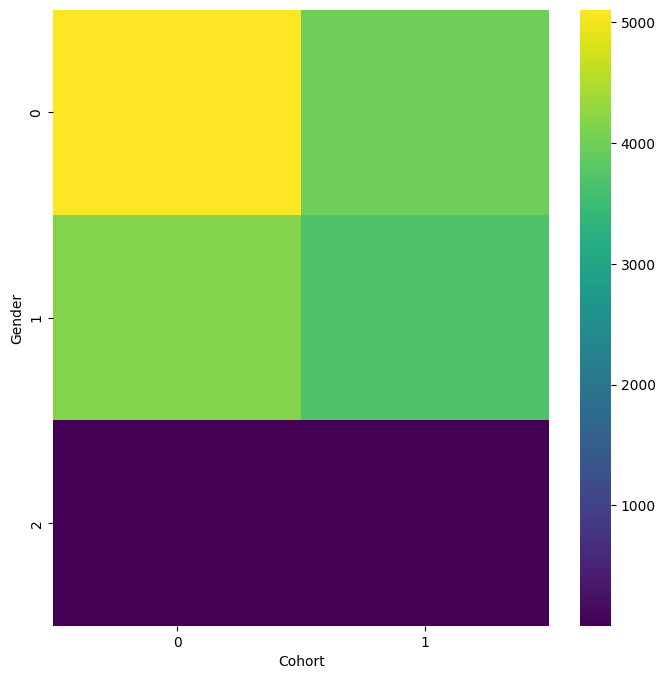

In [ ]:
# @title Cohort vs Gender

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Gender'].value_counts()
    for x_label, grp in enrollment_data.groupby('Cohort')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Cohort')
_ = plt.ylabel('Gender')

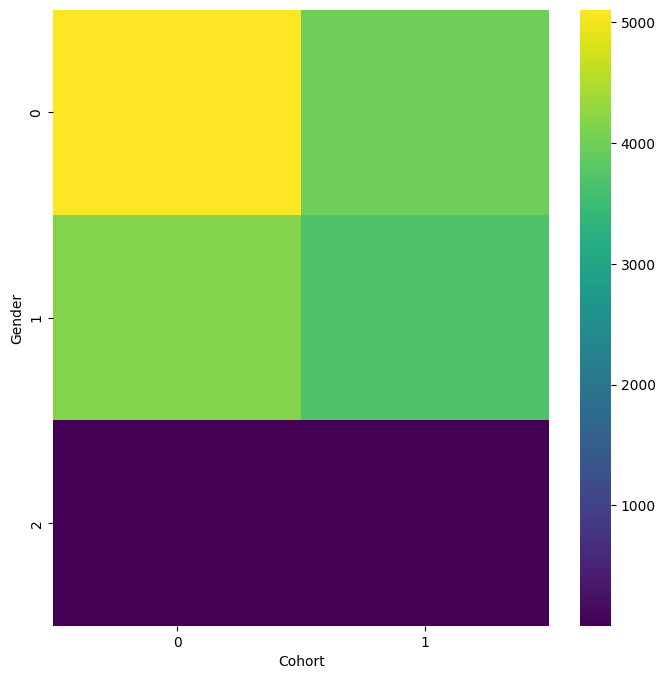

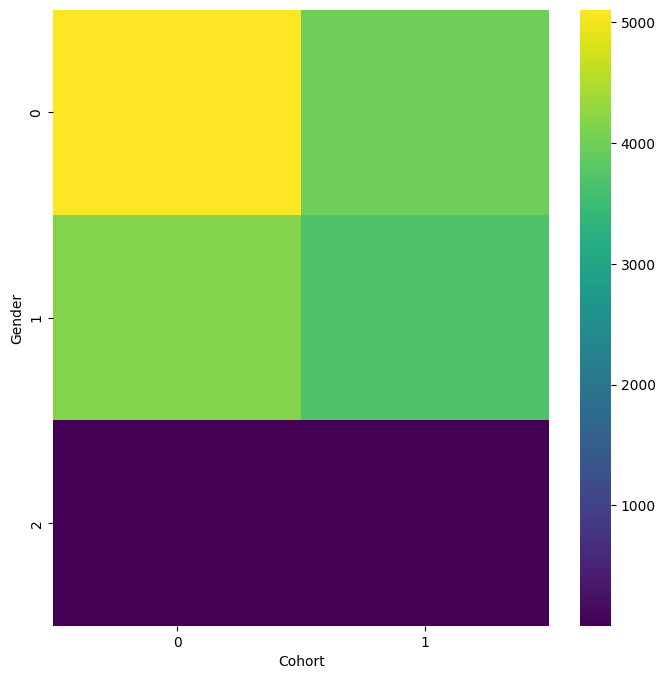

In [ ]:
# @title UA Full Time Part Time vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['UA Full Time Part Time']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'UA Full Time Part Time'}, axis=1)
              .sort_values('UA Full Time Part Time', ascending=True))
  xs = counted['UA Full Time Part Time']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = enrollment_data.sort_values('UA Full Time Part Time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Academic Program Campus')):
  _plot_series(series, series_name, i)
  fig.legend(title='Academic Program Campus', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('UA Full Time Part Time')
_ = plt.ylabel('count()')

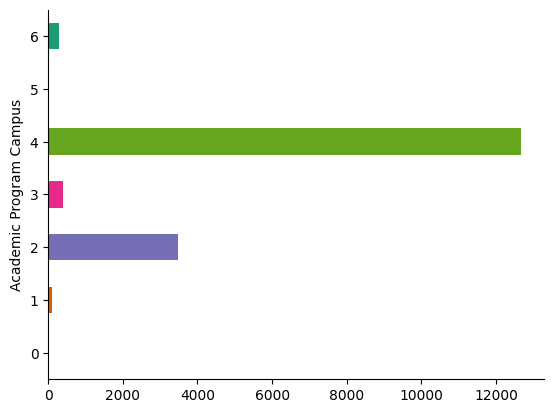

In [ ]:
# @title Academic Program Campus

from matplotlib import pyplot as plt
import seaborn as sns
enrollment_data.groupby('Academic Program Campus').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping data
campus_counts = enrollment_data.groupby('Academic Program Campus').size()

# Plotting a vertical bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=campus_counts.index, y=campus_counts.values, palette="viridis")

# Adding labels and title
plt.title("Number of Students by Academic Program Campus", fontsize=16)
plt.xlabel("Academic Program Campus", fontsize=12)
plt.ylabel("Number of Students", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.gca().spines[['top', 'right']].set_visible(False)  # Remove unnecessary spines
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load the dataset
file_path = '/content/UAIRDATA 16248.xlsx'  # Replace with your actual path
encoded_data = pd.read_excel(file_path).copy()  # Create a copy for safety

# Define the target column
target_column = 'UA Full Time Part Time'  # Replace with the actual column name

# Check if the target column exists
if target_column not in encoded_data.columns:
    print(f"Error: Target column '{target_column}' not found in the DataFrame.")
    print("Available columns:", encoded_data.columns)
else:
    # Drop the target column to create features
    X = encoded_data.drop(columns=[target_column])
    y = encoded_data[target_column]

    # Check if the target variable is categorical and encode it if needed
    if y.dtype == 'object' or y.dtype.name == 'category':
        y = y.astype('category').cat.codes  # Convert categorical target to numerical codes

    # Encode categorical features in X
    X = pd.get_dummies(X, drop_first=True)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Print confirmation
    print("Data successfully split into training and testing sets.")


Error: Target column 'UA Full Time Part Time' not found in the DataFrame.
Available columns: Index(['Admit Term', 'Admission Reporting Residency', 'Applicants', 'Admits',
       'Yield', 'Admit Type'],
      dtype='object')
